In [2]:
from data_augment.data_aug import *
from data_augment.bbox_util import *
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import pickle as pkl
# 内嵌绘图，省略掉plt.show()
%matplotlib inline  
import torch
# 获取环境变量
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
def xywhn2xyxy(x,w=640,h=640,padw=0,padh=0):
    y = x.clone() if isinstance(x,torch.Tensor) else np.copy(x)
    y[:,0] = w*(x[:,1]-x[:,3]/2)+padw   # top left x
    y[:,1] = h*(x[:,2]-x[:,4]/2)+padh   # top left y
    y[:,2] = w*(x[:,1]+x[:,3]/2)+padw   # bottom right x
    y[:,3] = h*(x[:,2]+x[:,4]/2)+padh   # bottom right y
    y[:,4] = x[:,0]
    return y.astype(float)

In [15]:
def xyxy2xywhn(x,w=640, h=640):
    y = x.clone() if isinstance(x,torch.Tensor) else np.copy(x)
    y[:,0] = x[:,4].astype(int)
    y[:,1] = (x[:,0] + x[:,2])/2/w
    y[:,2] = (x[:,1] + x[:,3])/2/h
    y[:,3] = (x[:,2]-x[:,0])/w
    y[:,4] = (x[:,3]-x[:,1])/h
    return y

In [20]:
source_directory_img_path = '../has_images'
source_directory_label_path= '../has_labels'
image_path = os.path.join(source_directory_img_path,"00008.jpg")
txt_path = os.path.join(source_directory_label_path,"00008.txt")
img = cv2.imread(str(image_path))[:,:,::-1]   #opencv loads images in bgr. the [:,:,::-1] does bgr -> rgb
h,w = img.shape[:2]
lb = np.loadtxt(txt_path)
bboxes = xywhn2xyxy(lb,w,h,0,0)
# bboxes = pkl.load(open("messi_ann.pkl", "rb"))

#inspect the bounding boxes
print(bboxes)

bboxes = xyxy2xywhn(bboxes,w,h)
print(bboxes)

[[1.83448800e+03 1.91997888e+03 2.13347808e+03 2.37999168e+03
  0.00000000e+00]
 [3.03947712e+03 6.17496960e+02 3.56249088e+03 1.03650624e+03
  1.00000000e+00]]
[[0.      0.36257 0.58936 0.05464 0.1261 ]
 [1.      0.60325 0.2267  0.09558 0.11486]]


In [21]:
path = "../"
def save_box(name, bboxes):
    with open(path + name,"w") as f:
        for i in range(len(bboxes)):
            f.write("%d %.5f %.5f %.5f %.5f\n" % tuple(bboxes[i]))
save_box("00008.txt",bboxes)       

In [19]:
for n in tqdm(range(len(df))):
    file = open(path + name,'a')
    if df['index'][n] == 0:
        file.close()
    else:
        file.write("%d %.5f %.5f %.5f %.5f\n" % tuple(cols.iloc[n]))
        file.close()

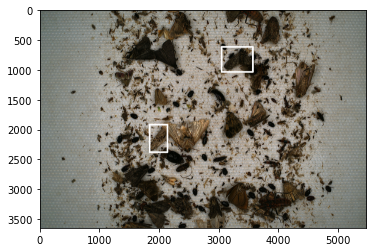

In [15]:
plotted_img = draw_rect(img, bboxes)
plt.imshow(plotted_img)
plt.show()

# 水平翻转

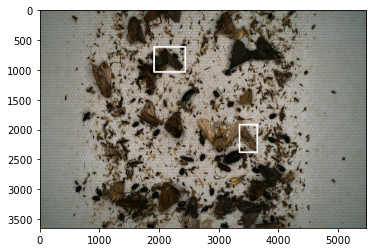

In [35]:
img_, bboxes_ = RandomHorizontalFlip(1)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

# Scale

缩放图片。当参数diff是True时，图片在垂直方向以及水平方向缩放到不同的值，也就是不保持宽高比。
如果第一个参数是浮点数，则x方向和y方向上的缩放因子从(-arg,arg)中随机采样

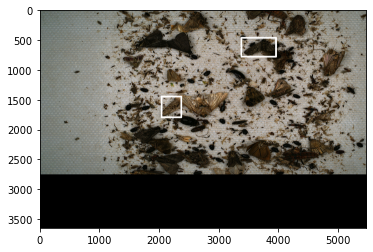

In [24]:
img_, bboxes_ = RandomScale(0.3,diff = True)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

# 旋转图片

旋转图片。如果第一个参数是整数，则旋转角度从(-arg,arg)中采样。另外，也可以用元组指定。

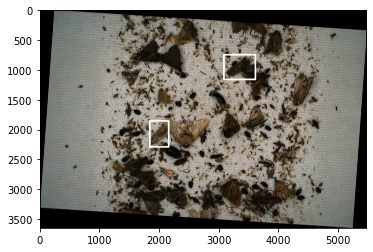

In [26]:
img_, bboxes_ = RandomRotate(20)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

# Shearing

水平裁剪图片。如果第一个参数是浮点型，裁剪因子从(-arg,arg)中采样。

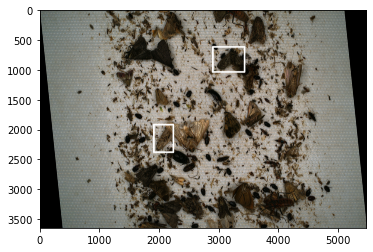

In [28]:
img_, bboxes_ = RandomShear(0.2)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

# Resizing

在保持图片宽高比的情况下将图片裁剪为resize为正方形。参数为正方形的边。


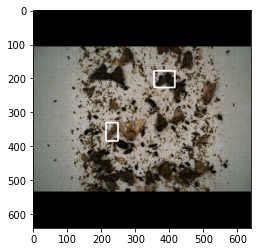

In [30]:
img_, bboxes_ = Resize(640)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

# HSV 变换

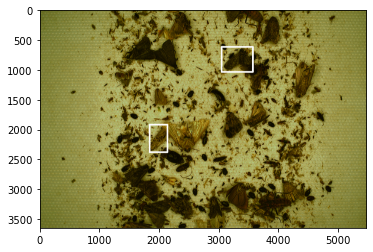

In [31]:
img_, bboxes_ = RandomHSV(100, 100, 100)(img.copy(), bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

可以把多个变换结合起来


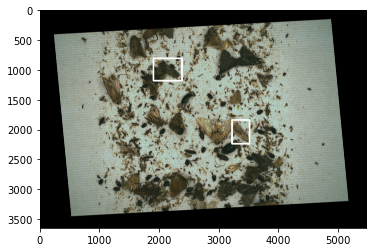

In [32]:
seq = Sequence([RandomHSV(40, 40, 30),RandomHorizontalFlip(), RandomScale(), RandomTranslate(), RandomRotate(10), RandomShear()])
img_, bboxes_ = seq(img.copy(), bboxes.copy())

plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

将变换之后的图片和标签存入文件夹里
